#Machine Learning Project
#Briakos Spyros 1115201700101 




##Question 1 
##Pre-processing,reducing dimensions, visualizing and classifing  images


###Import useful libraries.

In [ ]:
import os 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.decomposition import PCA
import cv2
from collections import OrderedDict
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from google.colab import drive

drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


###1) Implementation of function loadImages(path)

In [ ]:
def loadImages(path):
  
  #Get names of 30 images into a list
  names_of_images = os.listdir(path)
  
  #Create an empty list for content of images, one for labels and one for final images (for each image we have a huge vector)
  images = []
  labels = []
  final_array = []

  #Fill 'images' list with content of each image
  for image in names_of_images:
    #Read each image and append it to list
    img=mpimg.imread(path+'/'+image) 

    #Fill list 'labels' with the appropriate label Winter->0,Fall->1,Spring->2.
    if image[0]=='W':
      labels.append(0)
    elif image[0]=='F':
      labels.append(1)
    elif image[0]=='S':
      labels.append(2)
    
    #Make each image with 100x100 pixels and then append it to list 'images'.
    new_img = cv2.resize(img,(100,100))
    images.append(new_img)
  
    #Convert resized image to numpy 3D array (100,100,3) and then reshape to a simple vector (30000,1) and afterwards append vector to final_array.
    vector = np.array(new_img).reshape(-1)
    final_array.append(vector)

  #Convert final_array from list to numpy array 
  final_array = np.array(final_array)
  print("Final array's shape:",final_array.shape)
  return (final_array,labels)

final_array,labels = loadImages("/content/drive/My Drive/images/images")

Final array's shape: (30, 30000)


###2) Implementation of PCA_ImageSpaceVisualization(Χ)

Before PCA transformation: (30, 30000)
After PCA transformation: (30, 2)


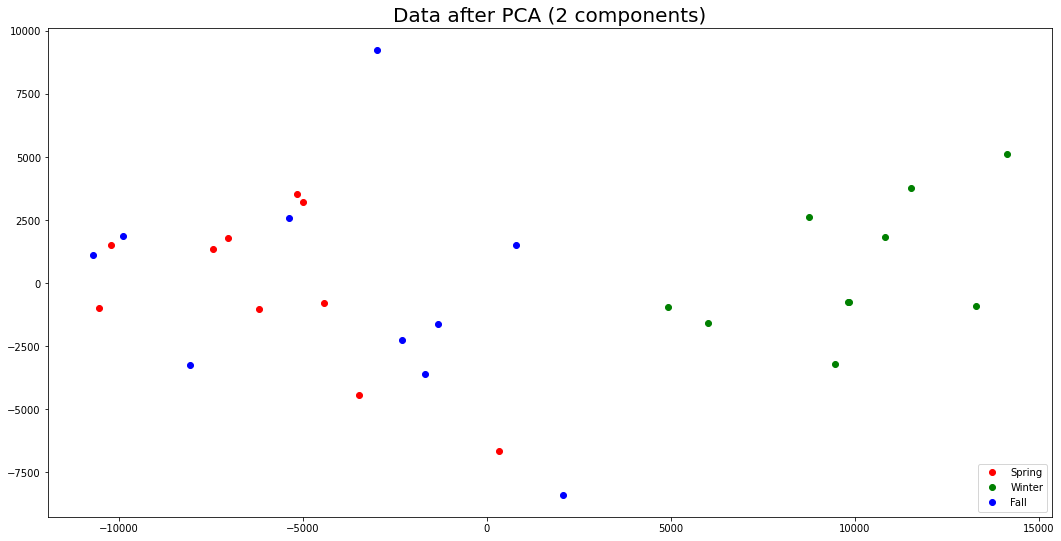

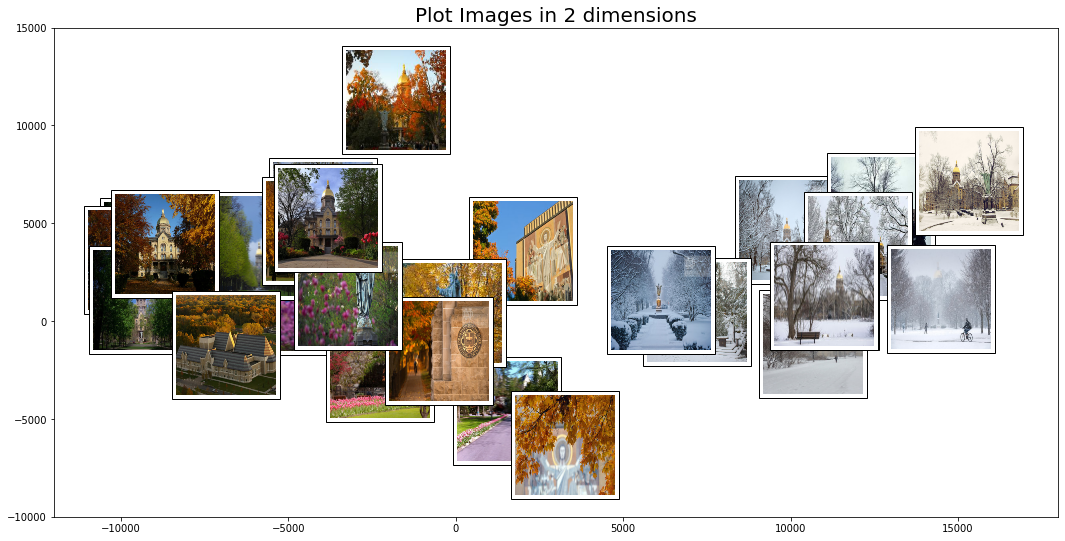

In [ ]:
def PCA_ImageSpaceVisualization(X):
  print("Before PCA transformation:",X.shape)
  components2 = PCA(n_components=2).fit_transform(X)
  print("After PCA transformation:",components2.shape)

  plt.figure(figsize=(18,9))
  plt.title('Data after PCA (2 components)',fontsize=20)
  x, y = zip(*components2)
  for i in range(len(labels)):
    if labels[i]==0:
      plt.plot(x[i],y[i],'ro',color='green',label='Winter')
    elif labels[i]==1:
      plt.plot(x[i],y[i],'ro',color='blue',label='Fall')  
    else:
      plt.plot(x[i],y[i],'ro',color='red',label='Spring')

  handles, labels1 = plt.gca().get_legend_handles_labels()
  by_label = OrderedDict(zip(labels1, handles))
  plt.legend(by_label.values(), by_label.keys(),loc='lower right')

  #Plot images with use of AnnotationBbox and OffsetImage.
  fig, ax = plt.subplots(figsize=(18,9))
  ax.scatter(x, y) 
  ax.set_xlim(-12000,+18000)
  ax.set_ylim(-10000,+15000)
  ax.set_title('Plot Images in 2 dimensions',size=20)

  for x0, y0, image in zip(x, y,X):
    ab = AnnotationBbox(OffsetImage(image.reshape(100,100,3)), (x0, y0),box_alignment=(0.1,0.1))
    ax.add_artist(ab)

PCA_ImageSpaceVisualization(final_array)

#### Theory's Questions

---


*2.1.1) Τι σημαίνει όταν εικόνες βρίσκονται κοντά σε αυτό το χώρο δύο διαστάσεων που απεικονίζεται στο παραπάνω plot;*

Στην παραπάνω απεικόνιση φαίνεται πως οι εικόνες οι οποίες βρίσκονται σε κοντινή απόσταση τείνουν να ανήκουν στην ίδια εποχή. Να σημειωθεί πως η ομαδοποίηση των εικόνων που ανήκουν στην εποχή 'Winter' είναι ολοφάνερη και πιο ξεκάθαρη σε σχέση με αυτές τις εικόνες που ανήκουν σε 'Spring' ή 'Fall' και αυτό συμβαίνει εξαιτίας του λευκού χρώματος (λόγω του χιονιού) που υπάρχει σε όλες τις χειμωνιάτικες εικόνες.

---



*2.1.2) Τι σημαίνει όταν εικόνες απέχουν πολύ;*

Σε αυτή την περίπτωση βάσει της παραπάνω απεικόνισης οι εικόνες που απέχουν μεταξύ τους μεγάλη απόσταση φαίνεται να μην έχουν ομοιότητες στην παλέτα χρωμάτων και κατ' επέκταση τείνουν να μην ανήκουν στην ίδια εποχή.

---


*2.1.3) Μπορούμε να γενικεύσουμε αυτά τα συμπεράσματα για τον αρχικό χώρο των εικόνων ο οποίος είναι πολύ μεγάλης διάστασης;*

Τα συμπεράσματα στις παραπάνω απαντήσεις μου, προέκυψαν από δεδομένα 30 εικονών όπου η κάθε εικόνα αρχικά είχε διαστάσεις ενός διανύσματος μεγέθους 30.000. Εξαιτίας του τεράστιου αριθμού από διαστάσεις-συνιστώσες που είχε η κάθε εικόνα, αλλά και για λόγους απεικόνισης-οπτικοποίησης χρησιμοποιήσαμε μια τεχνική-μέθοδο συμπίεσης διαστάσεων (Principal Component Analysis) και έτσι καταφέραμε να αναπαρίσταται στον δισδιάστατο χώρο η θέση της κάθε εικόνας. Η μέθοδος αυτή,PCA, έχει ως κύριο στόχο την μείωση των συνιστωσών, δηλαδή των διαστάσεων, όπου η κάθε συνιστώσα διατηρεί πληροφορία (κάποιες διατηρούν περισσότερη πληροφορία, άρα έχουν μεγαλύτερη 'βαρύτητα' όπου μπορεί να φανεί ξεκάθαρα με την χρήση του Explained Variance Ratio της PCA), ενώ παράλληλα προσπαθεί να διατηρήσει στις λίγες συνιστώσες την πλειοψηφία των σημαντικών πληροφοριών. Για τον λόγο αυτό παρόλο που η απόκλιση μεταξύ των 2 και των 
30.000 διαστάσεων είναι φαινομενικά πολύ μεγάλη μπορούμε να ισχυριστούμε πως και στις πολλές διαστάσεις αναμέναμε περίπου τα ίδια συμπεράσματα (ίσως με περισσότερη ακρίβεια λόγω των περισσότερων πληροφοριών.)

---



*2.2.1) Οι εικόνες που αντιστοιχούν σε μία από τις εποχές τείνουν να ομαδοποιούνται πιο κοντά από ότι οι υπόλοιπες; Γιατί συμβαίνει αυτό;* 


Παρατηρώντας ενδελεχώς την παραπάνω απεικόνιση μπορούμε να συμπεράνουμε πως στο δεξιό τμήμα του ορθογωνίου είναι συγκεντρωμένες οι εικόνες που απεικονίζουν την εποχή 'Winter' και αυτό συμβαίνει, όπως προαναφέρθηκε, εξαιτίας του λευκού χρώματος το οποίο προέρχεται από το χρώμα του χιονιού. Όσον αφορά τις εικόνες που απεικονίζουν τις εποχές 'Spring' και 'Fall' η πιθανότητα λάθους είναι αυξημένη και αυτό δικαιολογείται από το γεγονός πως τα χρώματα κάποιων εικόνων έχουν αρκετές ομοιότητες -σε επίπεδο pixel(RGB)- και αυτό έχεις ως αποτέλεσμα να βρίσκονται αρκετά κοντά στο δισδιάστατο χώρο. Παρόλο που υπάρχει και είναι αισθητή αυτή η πιθάνοτητα λάθους μεταξύ των 2 εποχών 'Spring'-'Fall' με αποτέλεσμα την μη βέλτιστη ομαδοποίηση κάθε εποχής ξεχωριστά, μπορούμε να δούμε πως οι εικόνες της άνοιξης ίσως έχουν μια κλίση προς το αριστερό τμήμα του ορθογωνίου ενώ του φθινοπώρου τείνουν να βρίσκονται στο πιο κεντρώο τμήμα.


---


### 3) Compare 1-NN's and SVM's average accuracy score

#### 3.1) Να ορίσετε μαθηματικά το μέτρο της ακρίβειας ταξινόμησης (classification accuracy).

Η απάντηση προκύπτει από το 5β σεμινάριο στο οποίο χαρακτηριστικά αναφέρεται πως: 

**"Αν είναι ίδια καταμετράτε στα TP (True Positives) (σωστες προβλέψεις). Βρίσκουμε τον λόγο TP/όλα για να έχουμε ένα μέτρο της ακρίβειας του αλγόριθμου (accuracy)."**

Επομένως το μέτρο της ακρίβειας ταξινόμησης ορίζεται ως ο λόγος του αριθμού των επιτυχημένων προβλέψεων ταξινόμησης προς τον συνολικό αριθμό των προβλέψεων.

#### 3.2) Χρησιμοποιείστε 5-fold cross validation και αναφέρετε τη μέση ακρίβεια ταξινόμησης για τους δύο ταξινομητές τόσο για τα δεδομένα μεγάλης διάστασης όσο και για τα χαρακτηριστικά χαμηλής διάστασης.

##### 5-cross validation score on data with huge dimensions (30,30000) 


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

#1-NN classifier
neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(final_array,labels)
neigh_scores = cross_val_score(neigh, final_array, labels, cv=5)
print("Accuracy of 1-NN: %0.2f " % (neigh_scores.mean()))

#SVM classifier
svm_clf = SVC(kernel='linear')
svm_clf.fit(final_array,labels)
svm_scores = cross_val_score(svm_clf, final_array, labels, cv=5)
print("Accuracy of SVM: %0.2f " % (svm_scores.mean()))

Accuracy of 1-NN: 0.80 
Accuracy of SVM: 0.87 


##### Process to find number of components, which we are going to use with PCA




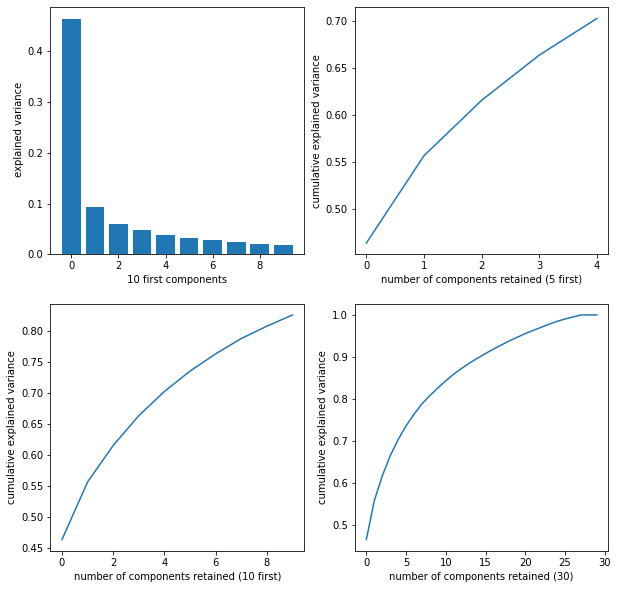

Explained variance ratio of 5 first components: 0.70
Explained variance ratio of 10 first components: 0.83


In [ ]:
pca = PCA(n_components=30, whiten=True).fit(final_array)
components = pca.transform(final_array)

cumExplainedVar=np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.bar(range(10),pca.explained_variance_ratio_[:10])
plt.xlabel(' 10 first components ')
plt.ylabel(' explained variance');

plt.subplot(2, 2, 2)
plt.plot(cumExplainedVar[:5])
plt.xlabel('number of components retained (5 first)')
plt.ylabel('cumulative explained variance');

plt.subplot(2, 2, 3)
plt.plot(cumExplainedVar[:10])
plt.xlabel('number of components retained (10 first)')
plt.ylabel('cumulative explained variance');

plt.subplot(2, 2, 4)
plt.plot(cumExplainedVar)
plt.xlabel('number of components retained (30)')
plt.ylabel('cumulative explained variance');

plt.show()
print("Explained variance ratio of 5 first components: %0.2f" % sum(pca.explained_variance_ratio_[:5]))
print("Explained variance ratio of 10 first components: %0.2f" % sum(pca.explained_variance_ratio_[:10]))


Μπορούμε να συμπεράνουμε πως μόλις με τις πρώτες 5 διαστάσεις με την βοήθεια του Explained Variance Ratio της PCA διατήρειται το 70% της συνολικής πληροφορίας που διατηρούν οι 30 διαστάσεις (όπου ο αριθμός 30 είναι ο μέγιστος αριθμός που μπορούμε να χρησιμοποίησουμε με την PCA στον πίνακα με shape 
(30,30000) ), ενώ με τις πρώτες 10 διαστάσεις διατηρείται το 83% της συνολικής πληροφορίας. Επομένως θα διαλέξουμε να συμπιέσουμε σε 10 διάστασεις λόγω του αρκετά ικανοποιητικού ποσοστού (83%), όπως αναφέρεται στις διαλέξεις του μαθήματος κυνηγάμε ένα ποσοστό ανάμεσα στο 80%-90%.

##### 5-cross validation score on data with small dimensions (30,10)


In [ ]:
#So we select the magic number 10 for components.
components = PCA(n_components=10,whiten=True).fit_transform(final_array)

#1-NN classifier
neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(components,labels)
neigh_scores = cross_val_score(neigh, components, labels, cv=5)
print("Accuracy of 1-NN: %0.2f " % (neigh_scores.mean()))

#SVM classifier
svm_clf = SVC(kernel='linear')
svm_clf.fit(components,labels)
svm_scores = cross_val_score(svm_clf, components, labels, cv=5)
print("Accuracy of SVM: %0.2f " % (svm_scores.mean()))

Accuracy of 1-NN: 0.63 
Accuracy of SVM: 0.73 


#### 3.3) Πώς θα προσδιορίσετε τη διάσταση των χαρακτηριστικών που θα εξάγεται μέσω της PCA;

Η διαδικασία που ακολούθησα για την επιλογή των components δηλαδή των διαστάσεων που θα μείωναμε απο 30.000 με την τεχνική-μέθοδος PCA φαίνεται λίγο παραπάνω με κεφαλίδα "Process to find number of components, which we are going to use with PCA". Ακολουθώντας την συλλογική πορεία του 6ου σεμιναρίου αρχικά μείωσα στο μέγιστο δυνατό, δηλαδή σε 30 συνιστώσες, τις διαστάσεις του πίνακα (30,30000) και έπειτα εκμεταλλεύτηκα το attribute της PCA, Explained Variance Ratio. Με την βοήθεια του απεικόνισα σε διαγράμματα πόση πληροφορία συγκεντρώνουν οι 5 πρώτες διαστάσεις, οι 10 πρώτες διαστάσεις αλλά και συνολικά και οι 30 διαστάσεις. Με γνώμονα πως οι 10 πρώτες διαστάσεις κατάφερναν και διατηρούσαν το 83% της πληροφορίας σε σχέση με τις 30 διαστάσεις επίλεξα να μειώσω σε αυτόν τον αριθμό τις συνιστώσες. Να σημειωθεί πως εξίσου ικανοποιητικό ήταν και το ποσόστο πληροφορίας που διατηρούσαν οι 5 πρώτες διαστάσεις, περί το 70%, με γνώμονα πάντα τον μικρό αριθμό διαστάσεων.


---
Τέλος πολύ χρήσιμη στάθηκε η εξής πρόταση του 6ου σεμιναρίου:

**"Για την ορθή χρήση της χρήσης PCA είναι πολύ σημαντική η ικανότητα εκτίμησης του αριθμού των στοιχείων που απαιτούνται για την περιγραφή των δεδομένων. Αυτό μπορεί να προσδιοριστεί εξετάζοντας το σωρευτικό  λόγο της εξηγούμενης  διακύμανσης σε σχέση με τον αριθμού των κυρίων συνιστωσών."**



#### 3.4) Ποιος ταξινομητής έχει τη καλύτερη επίδοση και γιατί;

Όπως προαναφέρθηκε και προηγουμένως στην απεικόνιση με τις εικόνες κυρίως στο αριστερό και στο κεντρώο τμήμα του ορθογωνίου, όπου είναι συγκεντρωμένες οι εικόνες της άνοιξης και του φθινοπώρου λόγω της ομοιότητας των χρωμάτων παρατηρούμε πως εικόνες από τις 2 διαφορετικές εποχές βρίσκονται σε αρκετά κοντινή απόσταση με αποτέλεσμα ο 1-Nearest-Neighbourhood να έχει αυξημένη την πιθανότητα λάθους, που σημαίνει ανακριβής ταξινόμηση, άρα και κατά προέκταση χειρότερη επίδοση σαν ταξινομητής. Για τον λόγο αυτόν παρατηρήθηκε πως σε όλες τις περιπτώσεις ο Support Vector Machine έχει καλύτερη επίδοση από τον 1-Νearest-Νeighbourhood.


##Question 2
##Regularized non-negative matrix factorization

>Έχοντας από την εκφώνηση το παρακάτω πρόβλημα βελτιστοποίησης για την κανονικοποιημένη μη-αρνητική παραγοντοποίηση πινάκων (regularized non-negative matrix factorization -regNMF):

$ ∥X − WC∥^2_F + λ∥W∥^2_F + λ∥C∥^2_F s.t.W ≥ 0, C ≥ 0 (I)$ 


>Το συγκεκριμένο πρόβλημα δεν έχει κλειστή λύση και θα επιλυθεί επαναληπτικα με την μέθοδο gradient descent step.Η γενικη αρχή είναι ότι σε κάθε βήμα του αλγορίθμου κινούμαστε προς την κατεύθυνση όπου η κλίση της συνάρτησης είναι  αρνητική (αρνητική τιμή της παραγώγου της συνάρτησης) μέχρι να φτάσουμε σε ένα τοπικό ελάχιστο.H λύση που προτείνεται και θα υλοποιηθεί στην συνέχεια είναι  ένας MU (multiplicative Update) αλγόριθμος τον οποίο και θα πρέπει να υπολογίσουμε.Χρησιμοποιώντας τους γενικούς update τύπους από την σελίδα 33 από την 6η διάλεξη του μαθήματος θα υπολογίσουμε τους επαναλήπτικους update τύπους για τις μεταβλητές W και C.

$ C_{[t+1]} = C_{[t]} − n_{C}∇_{C_{[t]}}ℓ(W,C[t]) $


$ W_{[t+1]} = W_{[t]} − n_{W}∇_{W_{[t]}}ℓ(W[t],C) $

t = t + 1

>Αρχικά πρέπει να υπολογίσουμε (τυχαία θα διαλέξουμε πρώτα την μεταβλητή W) το ανάδελτα (del) για την μεταβλητή W της βασικής μας συνάρτησης ελαχιστοποίησης, δηλαδή της (I). Κάνοντας χρήση της βασικής ιδιότητας $∥X∥^2=Tr(X^TX)$ έχουμε:

$ ∥X − WC∥^2_F + λ∥W∥^2_F + λ∥C∥^2_F = Tr((X − WC)^T(X − WC)) + λTr(W^TW) + λTr(C^TC)$

>Για τον 1ο όρο της συνάρτησης ελαχιστοποίησης θα εφαρμόσουμε επιμεριστική ιδιότητα και στη συνέχεια την βασική ιδιότητα: $Tr(A+B)=Tr(A)+Tr(B)$, οπότε:

$Tr((X − WC)^T(X − WC)) = Tr(XX^T-X^TWC-XW^TC^T+WW^TCC^T)$
$= Tr(XX^T)-Tr(X^TWC)-Tr(XW^TC^T)+Tr(WW^TCC^T)$

>Σε αυτό το σημείο θα υπολογίσουμε ξεχωριστά το ανάδελτα κάθε όρου για μεγαλύτερη σαφήνεια:


1.   $∇_{W}Tr(X^TX)=0$
2.   $∇_{W}Tr(C^TC)=0$
3.   $∇_{W}Tr(W^TW)=W$
4.   $∇_{W}Tr(X^TWC)= (X^TC)^T = C^TX$ 
5.   $∇_{W}Tr(XW^TC^T)=C^TX$
6.   $∇_{W}Tr(WW^TCC^T)=W(CC^T+(CC^T)^T)=2WCC^T$

>Στο 4) χρησιμοποιήθηκε η εξής ιδιότητα: $∇_{X}Tr(AX)=A^T$
                                                                                
>Στο 3),5) χρησιμοποιήθηκε η εξής ιδιότητα: $∇_{X}Tr(X^TA)=A$

>Στο 6) χρησιμοποιήθηκε η εξής ιδιότητα: $∇_{X}Tr(XAX^T)=X(A+A^T)$

>Επομένως για την μεταβλητή W το ανάδελτα της συνάρτησης ελαχιστοποίησης είναι:

$∇_{W}f(W,C)= -2XC^T + 2WCC^T + λW(II)$

>Επόμενο βήμα είναι ο υπολογισμός του learning rate ή αλλιώς step size για την μεταβλητή W, όπου και πάλι θα αντλήσουμε τον τύπο από την σελίδα 34 την 6η διάλεξη του μαθήματος, ο οποίος είναι ο εξής:

$n_W =\frac{W}{∇_{W}f(W,C)^+}$

>Όπου ο συμβολισμός + στο ανάδελτα στον παρονομαστή σηματοδοτεί πως πρέπει να βάλουμε όλους τους θετικούς όρους του ανάδελτα για την μεταβλητή W της συνάρτησης ελαχιστοποίησης, άρα έχουμε:

$n_W =\frac{W}{WCC^T + λW}$


>Η σταθερά 2 στους 2 πρώτους όρους του ανάδελτα μπορεί να ενσωματωθεί στο learning rate-step size και για αυτό μπορούμε να την αγνοήσουμε όπως γίνεται και στις διαφάνειες τους μαθήματος. Κατά αυτόν τον τρόπο το gradient descent step για την μεταβλητή W είναι:

$W = W - η_W⋅(-XC^T + WCC^T + λW)$
$W = W - \frac{W}{WCC^T + λW}⋅(-XC^T + WCC^T + λW)$
$W = W - \frac{W}{WCC^T + λW}⋅(-XC^T + WCC^T + λW)$
$W = \frac{WWCC^T+λWW +XC^TW-WWCC^T-λWW}{WCC^T + λW}$

$W = W*\frac{XC^T}{WCC^T + λW}$


>To * συμβολίζει το γινόμενο Hadamard (δηλ. γινόμενο στοιχείο προς στοιχείο του
πίνακα).

>Με παρόμοιο τρόπο υπολογίζουμε και τον update τύπο για την μεταβλητή C και έχουμε σαν αποτέλεσμα τους τελικούς αναλυτικούς multiplicative Update τύπους:

$C_{[t+1]} = C_{[t]}*\frac{XW_{[t]}^T}{C_{[t]}W_{[t]}W_{[t]}^T + λC_{[t]}} $ και

$W_{[t+1]} = W_{[t]}*\frac{XC_{[t]}^T}{W_{[t]}C_{[t]}C_{[t]}^T + λW_{[t]}} $ 


>Σημείωση: Ένας άλλος τρόπος ουτώς ώστε να επαληθέυσουμε πως οι multiplicative update τύποι είναι οι σωστοί είναι να κάνουμε χρήση της εξής ιδιότητας:
$θ←θ⋅\frac{∇_θf(θ)^-}{∇_θf(θ)^+}$, όπου $∇_θf(θ)^-$ and $∇_θf(θ)^+$ είναι οι αρνητικοί όροι και οι θετικοί όροι, αντίστοιχα, του ανάδελτα $∇_θf(θ)$. 
Από τον τύπο (ΙΙ) προκύπτει πως:
$∇_θf(θ)^- = ΧC^T$ και $∇_θf(θ)^+ = WCC^T+λW$, άρα πράγματι και με αυτόν τον τρόπο έχουμε: $W = W*\frac{XC^T}{WCC^T + λW}$

### RegNMF algorithm

In [ ]:
import numpy as np
import numpy.linalg as LA

def frobenius_error(X,W,C):
		return (LA.norm(X - np.dot(W, C))/ LA.norm(X))

#C_update formula in python
def update_C(X,W,C,l):
  numerator = np.dot(W.T, X)
  denominator = np.dot(W.T.dot(W), C) + l*C
  C *= numerator
  C /= denominator
  return C

#W_update formula in python
def update_W(X,W,C,l):
  numerator = X.dot(C.T)
  denominator = W.dot(C.dot(C.T)) + l*W
  W *= numerator
  W /= denominator
  return W

#RegNMF in python stops when absolute difference of previous and current error is <ε.
def RegNMF(X,k,l,epsilon):
  d,N = X.shape
  W = np.random.random((d, k))
  C = np.random.random((k, N))

  #Before iterations begin we calculate our two first C,W,frobenius errors. 
  i=2
  C_old=C
  C = update_C(X,W,C_old,l)
  W = update_W(X,W,C_old,l)
  prev_error = frobenius_error(X,W,C)
  C_old=C
  C = update_C(X,W,C_old,l)
  W = update_W(X,W,C_old,l)
  curr_error = frobenius_error(X,W,C)
  #If difference of 2 errors is <epsilon then terminate.
  while abs(curr_error-prev_error)>=epsilon:
    #Store previous error!
    prev_error=curr_error
    #Store old value of C so as to put the old value (not the updated C) inside update_W.
    C_old=C
    C = update_C(X,W,C_old,l)
    W = update_W(X,W,C_old,l)
    curr_error = frobenius_error(X,W,C)
    i=i+1
  
  print("Local minimum happens at iteration", i, ",k =",k ,",λ =", l, ",ε=", epsilon)
  return (W,C,curr_error,i) 

### Testing RegNMF with some different values of k,l,e.

In [ ]:
#Create an array with shape (500,1000).
Q = np.random.rand(500, 1000)
#Make sure that all values are no negative.
Q = np.where(Q<0, abs(Q), Q) 
#Print Q's shape.
print("Shape of array Q:",Q.shape,"\n-----------------------------------------------------------------")
#Values of λ.
l_values=[0.1,1,10,50,100,300,500,800,1000]
#Values of k.
k_values=[1,10,100]
#Values of epsilon.
e_values=[0.1,0.01,0.001]

#Create an empty list, which is gonna have 9 sublists, each sublist will keep 9 numbers of iterations.
all_iterations=[]
#Call RegNMF with all possible combinations of l=(0.1,1,10,50,100,300,500,800,1000),k=(1,10,100) and ε=(0.1,0.01,0.001).
for l in l_values:
  list_i=[]
  for k in k_values:
    for e in e_values:
      W, C, error, i = RegNMF(Q,k,l,e)
      list_i.append(i)
    if k!=100:
      print("- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - ")
  all_iterations.append(list_i)
  print("-----------------------------------------------------------------")

Shape of array Q: (500, 1000) 
-----------------------------------------------------------------
Local minimum happens at iteration 2 ,k = 1 ,λ = 0.1 ,ε= 0.1
Local minimum happens at iteration 2 ,k = 1 ,λ = 0.1 ,ε= 0.01
Local minimum happens at iteration 2 ,k = 1 ,λ = 0.1 ,ε= 0.001
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Local minimum happens at iteration 2 ,k = 10 ,λ = 0.1 ,ε= 0.1
Local minimum happens at iteration 2 ,k = 10 ,λ = 0.1 ,ε= 0.01
Local minimum happens at iteration 3 ,k = 10 ,λ = 0.1 ,ε= 0.001
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Local minimum happens at iteration 2 ,k = 100 ,λ = 0.1 ,ε= 0.1
Local minimum happens at iteration 2 ,k = 100 ,λ = 0.1 ,ε= 0.01
Local minimum happens at iteration 2 ,k = 100 ,λ = 0.1 ,ε= 0.001
-----------------------------------------------------------------
Local minimum happens at iteration 2 ,k = 1 ,λ = 1 ,ε= 0.1
Local minimum happens at iteration 2 ,k = 1 ,λ = 1 ,ε= 0.01
Local minimum hap

>Αξίζει να αναφερθεί πως για την επίλυση του 2ου ερωτήματος συμβουλεύτηκα και με βοηθήσαν αρκετά οι διαφάνειες της 6ης διάλεξης, καθώς και το lab6b και τέλος μετά από αρκετό google searching ένα τμήμα ενός paper το οποίο βρήκα στο συγκεκριμένο link: https://stats.stackexchange.com/questions/351359/deriving-multiplicative-update-rules-for-nmf

#### Display in different plots multiple barplots (visualization of results for each value of λ)

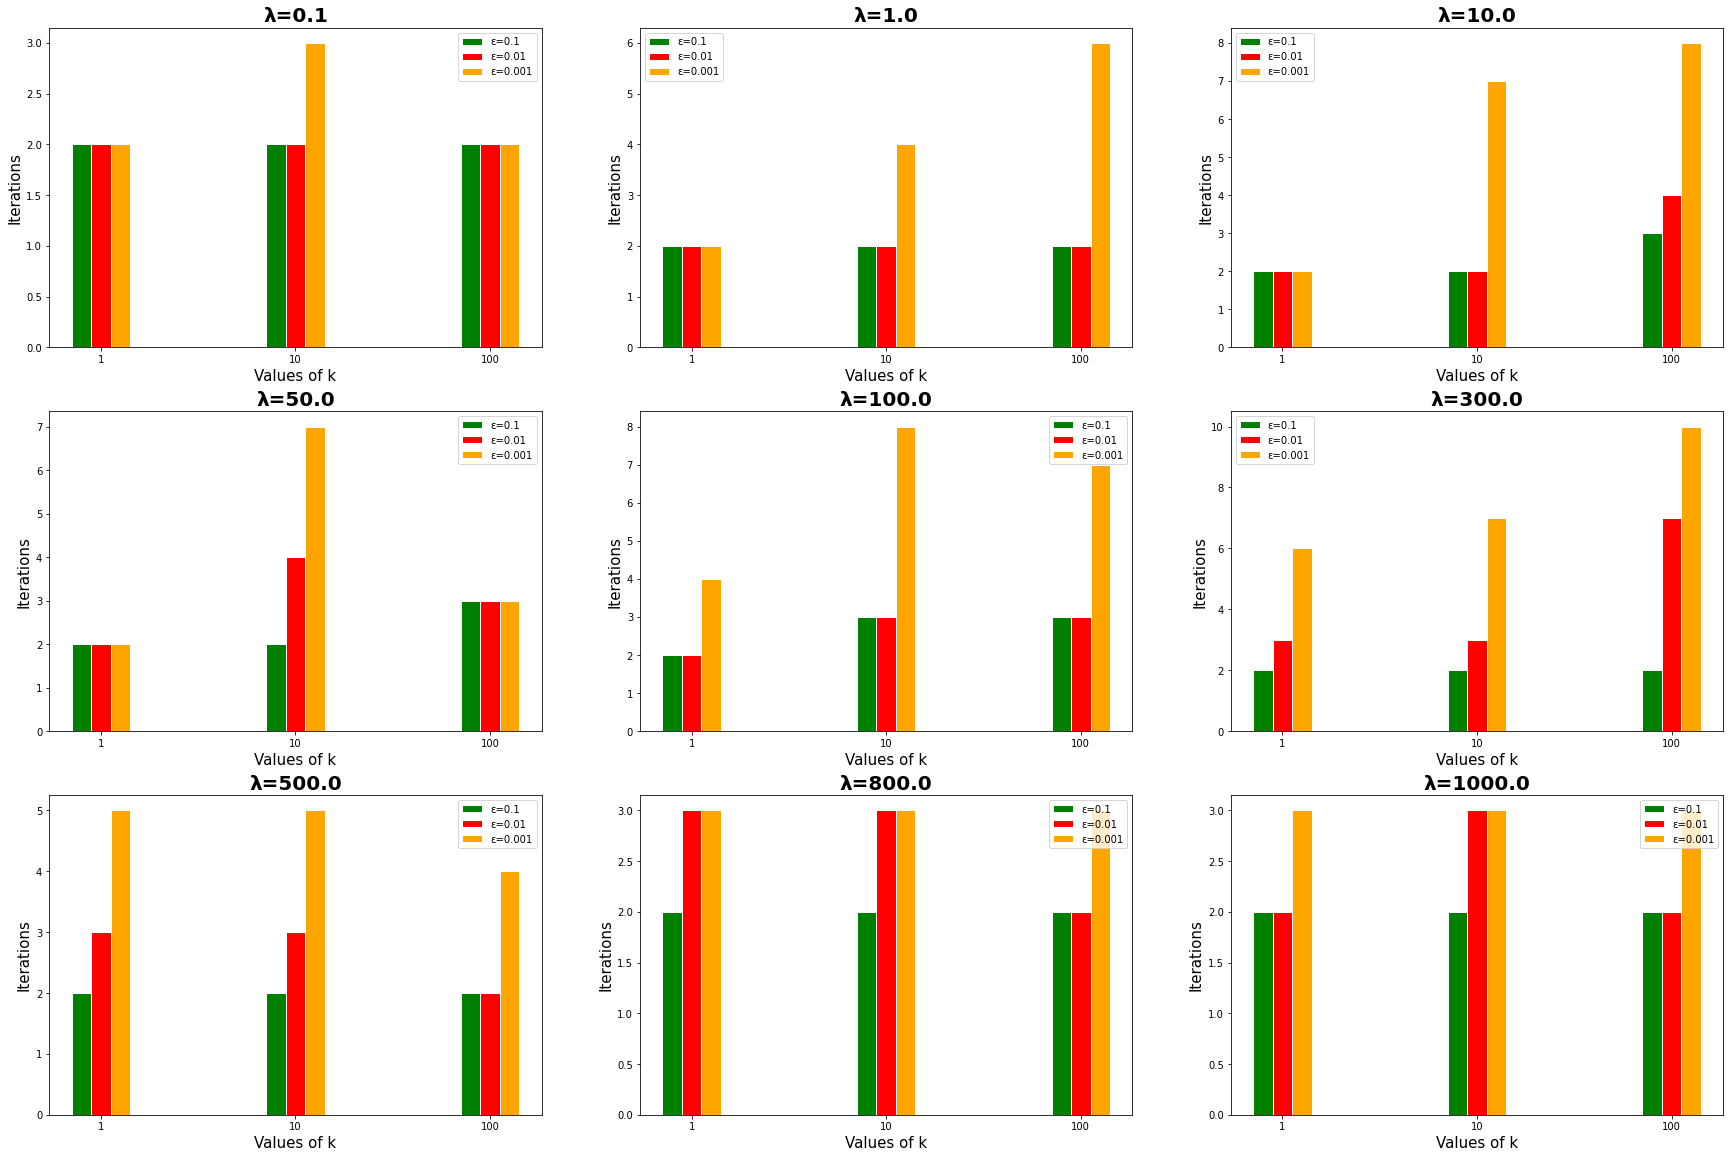

In [ ]:
plt.figure(figsize=(30,20))

for index,list_i in enumerate(all_iterations):
  barWidth=0.1
  curr_l=l_values[index]
  k1, k10, k100 = ([] for i in range(3))

  for j in range(3):
    k1.append(list_i[3*j])
    k10.append(list_i[3*j+1])
    k100.append(list_i[3*j+2])

  r1 = np.arange(len(k1))
  r2 = [x + barWidth for x in r1]
  r3 = [x + barWidth for x in r2]
  r4 = [x + barWidth for x in r3]

  plt.subplot(3, 3, index+1)
  plt.bar(r1, k1, color='green', width=barWidth, edgecolor='white', label='ε=0.1')
  plt.bar(r2, k10, color='red', width=barWidth, edgecolor='white', label='ε=0.01')
  plt.bar(r3, k100, color='orange', width=barWidth, edgecolor='white', label='ε=0.001')
  
  plt.title('λ=%.1f'%curr_l,fontweight='bold',size=20)
  plt.xlabel('Values of k',fontsize=15)
  plt.ylabel('Iterations',fontsize=15)
  plt.xticks([r + barWidth for r in range(3)], ['1', '10', '100'])
  
  plt.legend()
plt.show()

>Παρατηρώντας όλα τα plots μπορούμε να αντιληφθούμε την συμπεριφορά του αλγορίθμου μας βάσει των παραμέτρων.Ας αναλύσουμε μια-μια τις παραμέτρους...

>Σχετικά με την παράμετρο k που εκφράζει το πλήθος των συνιστωσών, που θα χωρίσουμε τον πίνακα εισόδου Χ (dxN) σε 2 καινούριους πίνακες dxk και kxN, μπορούμε να αποφανθούμε πως για κάποιες συγκεκριμένες τιμές του λ (όπως λ=10,λ=300) όσο αυξάνεται το k αυξάνεται και ο αριθμός επαναλήψεων, δηλαδή μειώνεται η ταχύτητα σύγκλισης του RegNMF. Στις υπόλοιπες διάφορες τιμές του λ μπορούμε να καταλάβουμε πως με την σταδιακή αύξηση του k=[1,10,100] δεν υπάρχουν μεγάλες μεταβολές στον αριθμό επαναλήψεων που χρειάζεται για να τερματίσει ο RegNMF.

>Σχετικά με την παράμετρο κανονικοποίησης λ αυτό που μπορεί να παρατηρηθεί ως συμπέρασμα είναι πως με την σταδιακή αύξηση του λ ο αριθμός των επαναλήψεων αυξάνεται ως μια συγκεκριμένη τιμή του λ, δηλαδή για τις τιμές [0.1,1,10,50,100,300] παρατηρείται μια σταδιακή αύξηση του number of iterations, όμως έπειτα για τις τιμές [500,800,1000] τα iterations φθίνουν. Θα μπορούσαμε να πούμε πως υπάρχει ένα τοπικό μέγιστο για την τιμή λ (λ=300 -> iterations=10). Τέλος αξίζει να σημειωθεί για μικρές τιμές του λ (μικρότερης ίσης της μονάδας) πως ο RegNMF έχει πολύ καλές επιδόσεις (χαρακτηριστικά για τις μεγαλύτερες τιμές epsilon χρειάζεται μόλις 2-3 iterations) και αυτό επιβεβαιώνεται επειδή στόχος μας είναι η ελαχιστοποίηση της συνάρτησης κόστους και άρα γενικά θα πρέπει ο συντελεστής να μειώνει τη συνολική παράσταση δηλαδή να διατηρεί ένα πολύ χαμηλό άθροισμα.


>Όσον αφορά το κατώφλι τερματισμού epsilon, αν και υπάρχει εκτενής νήξη παρακάτω, είμαστε βέβαιοι πως με την μείωση του epsilon ο αριθμός επαναλήψεων που χρειάζεται για να τερματίσει ο αλγόριθμος αυξάνεται με έναν ομαλό ρυθμό.

#### Let's see what happens when epsilon is getting extremely small.

In [ ]:
print("------------------------------------------------------------------")
#Values of λ.
l_values=[50,100,300]
#Values of k.
k_values=[10,100,1000]
#Values of epsilon.
e_values=[0.0001,0.00001,0.000001]

#Create an empty list, which is gonna have 3 sublists, each sublist will keep 9 numbers of iterations.
all_iterations=[]
#Call RegNMF with all possible combinations of λ=(50,100,300),k=(10,100,1000) and ε=(ε=1e-04,ε=1e-05,ε=1e-06).
for l in l_values:
  list_i=[]
  for k in k_values:
    for e in e_values:
      W, C, error, i = RegNMF(Q,k,l,e)
      list_i.append(i)
    if k!=1000:
      print("- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - ")
  all_iterations.append(list_i)
  print("------------------------------------------------------------------")

------------------------------------------------------------------
Local minimum happens at iteration 16 ,k = 10 ,λ = 50 ,ε= 0.0001
Local minimum happens at iteration 30 ,k = 10 ,λ = 50 ,ε= 1e-05
Local minimum happens at iteration 44 ,k = 10 ,λ = 50 ,ε= 1e-06
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Local minimum happens at iteration 4 ,k = 100 ,λ = 50 ,ε= 0.0001
Local minimum happens at iteration 31 ,k = 100 ,λ = 50 ,ε= 1e-05
Local minimum happens at iteration 46 ,k = 100 ,λ = 50 ,ε= 1e-06
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Local minimum happens at iteration 8 ,k = 1000 ,λ = 50 ,ε= 0.0001
Local minimum happens at iteration 26 ,k = 1000 ,λ = 50 ,ε= 1e-05
Local minimum happens at iteration 42 ,k = 1000 ,λ = 50 ,ε= 1e-06
------------------------------------------------------------------
Local minimum happens at iteration 15 ,k = 10 ,λ = 100 ,ε= 0.0001
Local minimum happens at iteration 21 ,k = 10 ,λ = 100 ,ε= 1e-05
Local minimum h

##### Display in different plots multiple barplots (visualization of results for each value of λ, very small epsilon values)

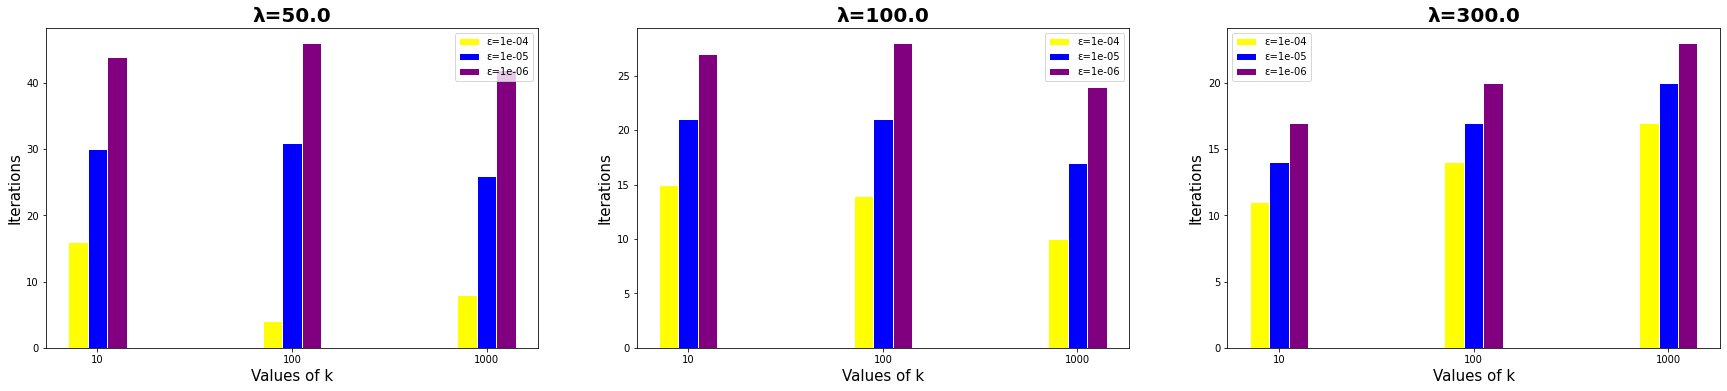

In [ ]:
plt.figure(figsize=(30,20))

for index,list_i in enumerate(all_iterations):
  barWidth=0.1
  curr_l=l_values[index]
  k10, k100, k1000 = ([] for i in range(3))

  for j in range(3):
    k10.append(list_i[3*j])
    k100.append(list_i[3*j+1])
    k1000.append(list_i[3*j+2])

  r1 = np.arange(len(k10))
  r2 = [x + barWidth for x in r1]
  r3 = [x + barWidth for x in r2]
  r4 = [x + barWidth for x in r3]

  plt.subplot(3, 3, index+1)
  plt.bar(r1, k10, color='yellow', width=barWidth, edgecolor='white', label='ε=1e-04')
  plt.bar(r2, k100, color='blue', width=barWidth, edgecolor='white', label='ε=1e-05')
  plt.bar(r3, k1000, color='purple', width=barWidth, edgecolor='white', label='ε=1e-06')
  
  plt.title('λ=%.1f'%curr_l,fontweight='bold',size=20)
  plt.xlabel('Values of k',fontsize=15,)
  plt.ylabel('Iterations',fontsize=15)
  plt.xticks([r + barWidth for r in range(3)], ['10', '100', '1000'])
  
  plt.legend()
plt.show()

>Επεκτείνοντας την απεικόνιση των αποτελέσματων, στα 3 παραπάνω plots μπορούμε να δούμε πως συμπεριφέρεται ο RegNMF αλγόριθμος με κάποιες συγκεκριμένες τιμές k=[10,100,1000] και λ=[50,100,300], αλλά αυτή τη φορά με αρκετά μικρές τιμές epsilon=[0.0001,0.00001,0.000001]. Δοκιμάζουμε αρκετά μικρές τιμές epsilon για να δοκιμάσουμε να μειώσουμε το κατώφλι τερματισμού του αλγορίθμου μας, δηλαδή ουσιαστικά μειώνουμε σε μεγάλο βαθμό την 'ψαλίδα' μεταξύ του τωρινού και του προηγούμενου σφάλματος ανακατασκευής και κατ' επέκταση αναγκάζουμε τον RegNMF να κάνει αρκετές επαναλήψεις σε σχέση με τα προηγούμενα αποτελέσματα. Πιο συγκεκριμένα στις προηγούμενες απεικονίσεις η πιο 'αργή' ταχύτητα σύγκλισης του RegNMF παρατηρήθηκε για τον μεγαλύτερο αριθμό των επαναλήψεων που ήταν 11 επαναλήψεις για k = 100 ,λ = 300 ,ε= 0.001. Πράγματι επιβεβαιώνεται αυτό που είπαμε, καθώς στις συγκεκριμένες καινούριες απεικονίσεις(για τα συγκεκριμένα k,λ) παρατηρούμε πως όσο το ε ελαττώνεται τόσο ο αριθμός επαναλήψεων αυξάνεται, δηλαδή η σύγκλιση γίνεται πιο αργή. Χαρακτηριστικά μπορούμε να αναλύσουμε πως για το προαναφερθέν παράδειγμα k=100,λ=300 για τις 3 μικρές τιμές του epsilon (ε=1e-04,ε=1e-05,ε=1e-06) τώρα έχουμε αριθμό των iterations 14,17,20 αντίστοιχα, ενώ σαν μέγιστος αριθμός επαναλήψεων στις 3 παραπάνω απεικονίσεις καταγράφηκε ο αριθμός 46*.

>**Τελικό συμπέρασμα για ε:** Όσο το κατώφλι τερματισμού epsilon ελαττώνεται τόσο η ταχύτητα σύγκλισης του RegNMF γίνεται πιο αργή, δηλαδή αυξάνεται ο αριθμός επαναλήψεων που χρειάζεται για να τερματιστεί ο αλγόριθμος.Να σημειωθεί πως αυτό παρατηρήθηκε γενικά σε όλα τα plots, απλά για τις συγκεκριμένες τιμές k,λ που έχουμε ακριβώς στα παραπάνω plots γίνεται αρκετά ξεκάθαρο το προαναφερθέν συμπέρασμα. 

##### *Υποσημείωση:

In [ ]:
W, C, error, i = RegNMF(Q,10,10,0.0001)
W, C, error, i = RegNMF(Q,10,10,0.00001)
W, C, error, i = RegNMF(Q,10,10,0.000001)

Local minimum happens at iteration 22 ,k = 10 ,λ = 10 ,ε= 0.0001
Local minimum happens at iteration 251 ,k = 10 ,λ = 10 ,ε= 1e-05
Local minimum happens at iteration 705 ,k = 10 ,λ = 10 ,ε= 1e-06


Προφανώς υπάρχουν πολλοί συνδυασμοί με τους οποίους μπορούμε να δείξουμε πως ο αλγόριθμος μας 'κουράζεται', έχει πολύ αργή σύγκλιση αλλά για λόγους απλότητας δεν τους επιλέξαμε (χρονοβόρα διαδικασία). Παρολ' αυτά ενδεικτικά μπορούμε να παρατηρήσουμε πως για τους 3 παραπάνω συνδυασμούς k,λ,epsilon έχουμε τεράστιο αριθμό επαναλήψεων, όσο το epsilon ελαττώνεται.